In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set();

In [2]:
"""
Гномы добывают золото, периодически сообщая о своей добыче.
В этой операции по добыче полезных ископаемых использовались два поколения инструментов,
некоторые гномы были оснащены инструментами 1-го поколения, другие - 2-го поколения.
После внедрения инструментов нового поколения генеральный директор Gnome Inc заметил,
что производительность не соответствует его ожиданиям.
Вы, как аналитик Gnome Inc, должны подтвердить или опровергнуть опасения генерального директора,
подкрепляющие ваши выводы холодными достоверными данными.
"""

def csv_reader(path):
    return pd.read_csv(path)

path = r'..//data//gold_mining_data.csv'

data = csv_reader(path)

In [3]:
data.head()

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
0,1,2014-01-01,2014-01-31,656,2014-01-01
1,1,2014-01-01,2014-02-28,565,2014-01-01
2,1,2014-01-01,2014-03-31,516,2014-01-01
3,1,2014-01-01,2014-04-30,568,2014-01-01
4,1,2014-01-01,2014-05-31,556,2014-01-01


In [4]:
data.tail()

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
13488,2673,2015-08-01,2015-08-31,695,2015-01-01
13489,2674,2015-08-01,2015-08-31,573,2015-01-01
13490,2675,2015-08-01,2015-08-31,617,2015-01-01
13491,2676,2015-08-01,2015-08-31,609,2015-01-01
13492,2677,2015-08-01,2015-08-31,622,2015-01-01


Что можно понять по этой части, бегло взглянув на данные?

Для начала посмотрим на названия колонок:

dwarf_id: это непосредственно id каждого гнома, участвующего в тестировании;

hider_date: если дословно, то "дата примема на работу", в контексте нашей задачи это скорее всего дата, когда гном был создан для выполнения свое задачи; 

reported_date: требует анализа;

gold_mined: колличество золота, который гном произвел за промежуток времяни;

harmer_date: требует анализа.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dwarf_id       13493 non-null  int64 
 1   hired_date     13493 non-null  object
 2   reported_date  13493 non-null  object
 3   gold_mined     13493 non-null  int64 
 4   hammer_date    13493 non-null  object
dtypes: int64(2), object(3)
memory usage: 527.2+ KB


In [6]:
# Проверка на отсутствие каких-либо данных
data.isnull().sum()

dwarf_id         0
hired_date       0
reported_date    0
gold_mined       0
hammer_date      0
dtype: int64

Количество уникальных значений для каждой колонки:
dwarf_id         2677
hired_date         20
reported_date      20
gold_mined        350
hammer_date         2
dtype: int64
---------------
['2014-01-01' '2015-01-01']
['2014-01-01' '2014-02-01' '2014-03-01' '2014-04-01' '2014-05-01'
 '2014-06-01' '2014-07-01' '2014-08-01' '2014-09-01' '2014-10-01'
 '2014-11-01' '2014-12-01' '2015-01-01' '2015-02-01' '2015-03-01'
 '2015-04-01' '2015-05-01' '2015-06-01' '2015-07-01' '2015-08-01']
---------------
Проверочка на красность, 5.040343668285394


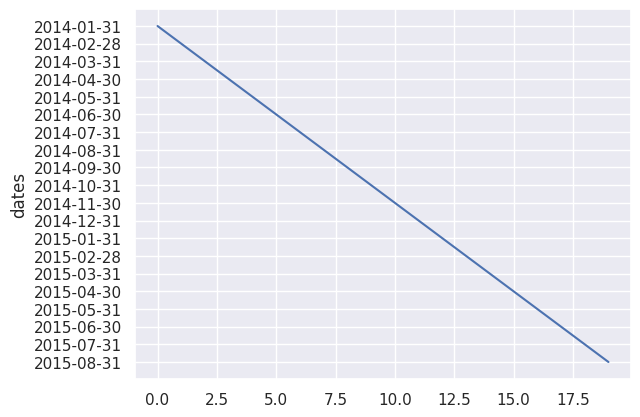

In [7]:
# Посчитаем количество уникальных гномов
print(f'Количество уникальных значений для каждой колонки:\n'
      f'{data.nunique()}')
print('---------------')

print(data['hammer_date'].unique())
print(data['hired_date'].unique())

print('---------------')
""" 
Если учесть что количество айдишников дварфов 13493,
а уникальных значений их айди 2677 можно сделать вывод, 
что они повторяются и имеется несколько временных промежутков.
"""

print(f'Проверочка на красность, {data["dwarf_id"].count() / 2677}')

reported_df = pd.DataFrame()
reported_df['dates'] = data['reported_date'].unique()
reported_df['index'] = pd.Series(np.arange(20))

sns.lineplot(y="dates", x=reported_df.index, data=reported_df);

In [8]:
unique_rep = data['reported_date'].unique()
unique_hir = data['hired_date'].unique()
unique_ham = data['hammer_date'].unique()

for i in range(0, (data['reported_date'].nunique())):
    print('reported_date{0}'.format(i), ':',  unique_rep[i])

print('--------------')

for i in range(0, (data['hired_date'].nunique())):
    print('hired_date{0}'.format(i), ':', unique_hir[i])
    
print('--------------')

for i in range(0, (data['hammer_date'].nunique())):
    print('hammer_date{0}'.format(i), ':', unique_ham[i])

reported_date0 : 2014-01-31
reported_date1 : 2014-02-28
reported_date2 : 2014-03-31
reported_date3 : 2014-04-30
reported_date4 : 2014-05-31
reported_date5 : 2014-06-30
reported_date6 : 2014-07-31
reported_date7 : 2014-08-31
reported_date8 : 2014-09-30
reported_date9 : 2014-10-31
reported_date10 : 2014-11-30
reported_date11 : 2014-12-31
reported_date12 : 2015-01-31
reported_date13 : 2015-02-28
reported_date14 : 2015-03-31
reported_date15 : 2015-04-30
reported_date16 : 2015-05-31
reported_date17 : 2015-06-30
reported_date18 : 2015-07-31
reported_date19 : 2015-08-31
--------------
hired_date0 : 2014-01-01
hired_date1 : 2014-02-01
hired_date2 : 2014-03-01
hired_date3 : 2014-04-01
hired_date4 : 2014-05-01
hired_date5 : 2014-06-01
hired_date6 : 2014-07-01
hired_date7 : 2014-08-01
hired_date8 : 2014-09-01
hired_date9 : 2014-10-01
hired_date10 : 2014-11-01
hired_date11 : 2014-12-01
hired_date12 : 2015-01-01
hired_date13 : 2015-02-01
hired_date14 : 2015-03-01
hired_date15 : 2015-04-01
hired_dat

In [9]:
"""
Получается что мы подтверидили нашу догадку, что hired_date - это дата когда гном был создан.
Промежуток времени когда у гномов были инструменты 1го уровня это от
2014-01-01 до 2015-01-01. После гномам предоставили молот второго уровня.
reported_date -будем считать, днем каждого замера.
"""

"""
        Предложения:
        
Пока основная метрика в теориях это среднее значение, но только на этапе постоения
теорий. Затем метрики могут добавиться и видоизмениться.
 
1) Разделить на 2 датасета. До и после получения нового молота
2) Затем проанализировать то, как шел прирост золота
3) Визуализировать данные по приросту золота в зависимости от даты и молота.
    3.1) Теория 1:
        Новый инструмент не приносит пользу, ровно как и выгоду,
        тогда изменение данных будет стремиться к 0
        при сравнении характеров прироста золота в двух сдучаях.
    3.2) Теория 2:
        Новый инструмент приносит пользу, но не сразу. Тогда
        мы увмидим, что среднее количество заработанного золота у гномов будет
        увеличиваться, только через како-то промежут времени после нововведения,
        а в самом начале не будет никакой разницы или будет средний заработок меньше.
    3.3) Теория 3:
        Новый интсрумент приносит пользу сразу.
        Среднее значение растет сразу при получении нового инструмента.
    3.4) Теория 4:
        Новый инструмент приносит убытки. Среднее значения добываемого золота не 
        увеличивается, а уменьшается с момента получения нового молота.
"""

# data_hammer_1
data_hammer_1 = data[(data['hammer_date'] == '2014-01-01')]
# data_hammer_2
data_hammer_2 = data[(data['hammer_date'] == '2015-01-01')]

In [10]:
data.loc[6770:6800]

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
6770,531,2014-12-01,2015-02-28,547,2014-01-01
6771,531,2014-12-01,2015-03-31,580,2014-01-01
6772,531,2014-12-01,2015-04-30,536,2014-01-01
6773,531,2014-12-01,2015-05-31,523,2014-01-01
6774,531,2014-12-01,2015-06-30,621,2014-01-01
6775,531,2014-12-01,2015-07-31,572,2014-01-01
6776,531,2014-12-01,2015-08-31,575,2014-01-01
6777,532,2015-01-01,2015-01-31,713,2015-01-01
6778,532,2015-01-01,2015-02-28,651,2015-01-01
6779,532,2015-01-01,2015-03-31,590,2015-01-01


In [11]:
data_hammer_1

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
0,1,2014-01-01,2014-01-31,656,2014-01-01
1,1,2014-01-01,2014-02-28,565,2014-01-01
2,1,2014-01-01,2014-03-31,516,2014-01-01
3,1,2014-01-01,2014-04-30,568,2014-01-01
4,1,2014-01-01,2014-05-31,556,2014-01-01
...,...,...,...,...,...
6772,531,2014-12-01,2015-04-30,536,2014-01-01
6773,531,2014-12-01,2015-05-31,523,2014-01-01
6774,531,2014-12-01,2015-06-30,621,2014-01-01
6775,531,2014-12-01,2015-07-31,572,2014-01-01


In [12]:
data_hammer_2

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
6777,532,2015-01-01,2015-01-31,713,2015-01-01
6778,532,2015-01-01,2015-02-28,651,2015-01-01
6779,532,2015-01-01,2015-03-31,590,2015-01-01
6780,532,2015-01-01,2015-04-30,546,2015-01-01
6781,532,2015-01-01,2015-05-31,595,2015-01-01
...,...,...,...,...,...
13488,2673,2015-08-01,2015-08-31,695,2015-01-01
13489,2674,2015-08-01,2015-08-31,573,2015-01-01
13490,2675,2015-08-01,2015-08-31,617,2015-01-01
13491,2676,2015-08-01,2015-08-31,609,2015-01-01


In [13]:
"""
Подсчитаем количество заработанное дварфами в сумме и по каждому отдельно.
"""
dwarfs_count_1 = data_hammer_1['dwarf_id'].nunique()
dwarfs_count_2 = data_hammer_2['dwarf_id'].nunique()

print(f'Колличество дварфов в 1 датасете: {dwarfs_count_1}\n'
      f'Колличество дварфов во 2 датасете: {dwarfs_count_2}')

Колличество дварфов в 1 датасете: 531
Колличество дварфов во 2 датасете: 2146


In [14]:
"""
Пока не нравится тот факт, что в них разное количество гномов.
Не нравится что 
Но пока мы аппелирует средним значением и возможно димперсией это не страшно.
"""

"""
Для каждого гнома создадим список. Где будет находится все отсчеты золота, чтобы 
найти определенные метрики. 
Вернемся пока к первоначальному датасету
"""

"""
Теперь считаем, что гному к которых hammer_date = 2014-01-01 - это те гномы которые меняли молот в 2015 г,
а те у кого 2015-01-01 начали работать сразу с новым молотом. Для получения данных проанализируем данный для
тех гномов, которые меняли свои инструменты.
"""

List_1 = data_hammer_1.values.tolist()

In [15]:
# Создадим с писок в котором будут значения, которые помогут нам 
# понять характер изменения данных в выборке

list_for_mean = []
lil_list = []
# цикл, в котором мы создаем список списков с необходимыми выборками
for i in range(0, len(List_1)):
    
    try:
        if List_1[i][0] == List_1[i+1][0]:
            lil_list.append(List_1[i][3])

        else: 
            lil_list.append(List_1[i][3])
            list_for_mean.append(lil_list)
            # print(lil_list)
            lil_list = []
        
    except IndexError:
        lil_list.append(List_1[i][3])
        list_for_mean.append(lil_list)
        lil_list = []
"""
Мы нашли все отсчеты заработка для всех гномов которые были поддвержкены реновациям
Теперь для каждого отсчета надо найти среднее значение и 
"""


"""
Теперь получим грубое среднее
и постоим график изменения производительности работы гномов
"""
cols_ = []
for i in range(0, (data['reported_date'].nunique())):
    cols_.append('point_{0}'.format(i))

df = pd.DataFrame(data=list_for_mean, columns=cols_)

In [16]:
data = [
 df['point_0'].mean(),
 df['point_1'].mean(),
 df['point_2'].mean(),
 df['point_3'].mean(),
 df['point_4'].mean(),
 df['point_5'].mean(),
 df['point_6'].mean(),
 df['point_7'].mean(),
 df['point_8'].mean(),
 df['point_9'].mean(),
 df['point_10'].mean(),
 df['point_11'].mean(),
 df['point_12'].mean(),
 df['point_13'].mean(),
 df['point_14'].mean(),
 df['point_15'].mean(),
 df['point_16'].mean(),
 df['point_17'].mean(),
 df['point_18'].mean(),
 df['point_19'].mean(),
]

In [17]:
final_df = pd.DataFrame(data=zip(data, list(unique_hir)), columns=['mean_gold', 'date'])

# final_df = final_df.reindex(index=final_df.index[::-1])

final_df = final_df.round(2)

In [18]:
final_df

,mean_gold,date
0,599.93,2014-01-01
1,588.59,2014-02-01
2,579.95,2014-03-01
3,570.76,2014-04-01
4,559.85,2014-05-01
5,550.36,2014-06-01
6,540.65,2014-07-01
7,528.79,2014-08-01
8,520.59,2014-09-01
9,510.65,2014-10-01


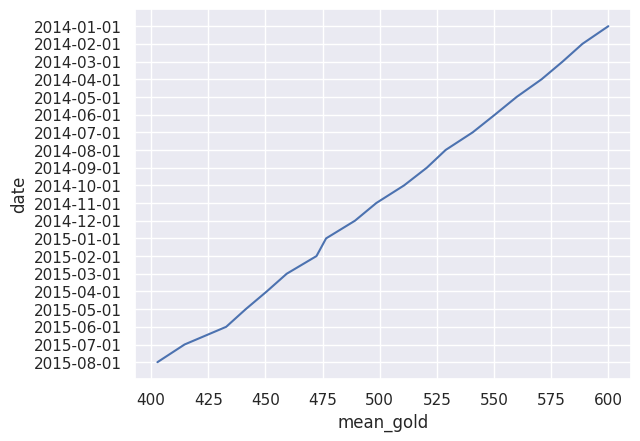

In [19]:
"""
Наконец мы можем построить график изменения среднего значения золота в месяц для
тех гномов, которые поддвергились реновациям
"""

sns.lineplot(data=final_df, x='mean_gold', y='date', markers=True, dashes=True);

In [36]:
"""
Таким образом из графика видно, как уменьшается среднее значение выработки золота со временем.
Но по такому характеру изменения, почти линейному можно сказать,
что теория относительно того, что при изменении инструмента ничегг не изменилось.
"""

"""Попробуем пойти по другому пути"""
# df.set_index([df.ID, df.index])

data = csv_reader(path)
data_multy = data.copy()

In [37]:
data_multy = data_multy.set_index([data_multy.dwarf_id, data_multy.index])
"""
Мы создали объект мультииндекса. Можно теперь на основе такого датафрейма создать 
интересные визуальизации данных
""";

In [38]:
data_multy.loc[:2]

dwarf_id  hired_date reported_date  gold_mined hammer_date
dwarf_id                                                               
1        0          1  2014-01-01    2014-01-31         656  2014-01-01
         1          1  2014-01-01    2014-02-28         565  2014-01-01
         2          1  2014-01-01    2014-03-31         516  2014-01-01
         3          1  2014-01-01    2014-04-30         568  2014-01-01
         4          1  2014-01-01    2014-05-31         556  2014-01-01
         5          1  2014-01-01    2014-06-30         565  2014-01-01
         6          1  2014-01-01    2014-07-31         512  2014-01-01
         7          1  2014-01-01    2014-08-31         547  2014-01-01
         8          1  2014-01-01    2014-09-30         507  2014-01-01
         9          1  2014-01-01    2014-10-31         487  2014-01-01
         10         1  2014-01-01    2014-11-30         500  2014-01-01
         11         1  2014-01-01    2014-12-31         485  2014-01-01
         12         1  2014-01-01    2015-01-31         489  2014-01-01
         13         1  2014-01-01    2015-02-28         428  2014-01-01
         14         1  2014-01-01    2015-03-31         479  2014-01-01
         15         1  2014-01-01    2015-04-30         445  2014-01-01
         16         1  2014-01-01    2015-05-31         446  2014-01-01
         17         1  2014-01-01    2015-06-30         505  2014-01-01
         18         1  2014-01-01    2015-07-31         407  2014-01-01
         19         1  2014-01-01    2015-08-31         409  2014-01-01
2        20         2  2014-01-01    2014-01-31         561  2014-01-01
         21         2  2014-01-01    2014-02-28         580  2014-01-01
         22         2  2014-01-01    2014-03-31         542  2014-01-01
         23         2  2014-01-01    2014-04-30         600  2014-01-01
         24         2  2014-01-01    2014-05-31         573  2014-01-01
         25         2  2014-01-01    2014-06-30         553  2014-01-01
         26         2  2014-01-01    2014-07-31         520  2014-01-01
         27         2  2014-01-01    2014-08-31         577  2014-01-01
         28         2  2014-01-01    2014-09-30         498  2014-01-01
         29         2  2014-01-01    2014-10-31         525  2014-01-01
         30         2  2014-01-01    2014-11-30         480  2014-01-01
         31         2  2014-01-01    2014-12-31         479  2014-01-01
         32         2  2014-01-01    2015-01-31         501  2014-01-01
         33         2  2014-01-01    2015-02-28         437  2014-01-01
         34         2  2014-01-01    2015-03-31         460  2014-01-01
         35         2  2014-01-01    2015-04-30         501  2014-01-01
         36         2  2014-01-01    2015-05-31         453  2014-01-01
         37         2  2014-01-01    2015-06-30         406  2014-01-01
         38         2  2014-01-01    2015-07-31         384  2014-01-01
         39         2  2014-01-01    2015-08-31         435  2014-01-01

In [39]:
data

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
0,1,2014-01-01,2014-01-31,656,2014-01-01
1,1,2014-01-01,2014-02-28,565,2014-01-01
2,1,2014-01-01,2014-03-31,516,2014-01-01
3,1,2014-01-01,2014-04-30,568,2014-01-01
4,1,2014-01-01,2014-05-31,556,2014-01-01
...,...,...,...,...,...
13488,2673,2015-08-01,2015-08-31,695,2015-01-01
13489,2674,2015-08-01,2015-08-31,573,2015-01-01
13490,2675,2015-08-01,2015-08-31,617,2015-01-01
13491,2676,2015-08-01,2015-08-31,609,2015-01-01


In [53]:
# data_hammer_1
print(data_hammer_1.shape)
# data_hammer_2
print(data_hammer_2.shape)

(6777, 5)
(6716, 5)


In [49]:
"""
Но если в целом посмотреть на данный при группировке
и принять во внимание что колличество отсчетов в
двух половинах почти равны. То непонятно как так вышло, что те кто получил новый
молот заработали больше.
"""
data.groupby('hammer_date').sum()

/tmp/ipykernel_18081/1637622762.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('hammer_date').sum()


,dwarf_id,gold_mined
hammer_date,,
2014-01-01,1555533,3640010
2015-01-01,8223470,4094482
